# <u>Group Project: Kickstarter Campaign</u>

Kickstarter is a company that provides the space for independent artists, creative, innovators, and entrepreneurs to bring their unique projects to life. Kickstarter allows anyone to financially support the project through an online pledging system - this means; anyone can pledge a specific amount of money towards the funding goal of the project. Kickstarter projects (also called campaigns) are all-or-nothing -- meaning, if the funding goal isn't met 100% (or exceeded), the project campaign fails and no funding is provided. The stakes are high - but what is it about certain campaigns that make them succeed while others fail? 

You have joined the marketing team for Kickstarter and you are tasked with exploring the features of several campaigns over the past few years. You are responsible for looking at this dataset and pulling out key insights about the characteristics of Kickstarter campaigns that make them more likely to succeed or fail. The marketing team at Kickstarter has a limited amount of funds to devote to highlighting specific projects, and they want to highlight projects that have the best chance of succeeding (i.e. meeting the funding goal). Can you help them determine who that might be?

Complete the steps below to take a dataset from inception to insights, for the purpose of answering the following two questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

After you have combed through the data, your group will put together a presentation (including visualizations), that clearly answers the two questions above. The Kickstarter dataset is posted to Canvas. Complete the code in the notebook below to complete the project. <b> You are NOT restricted to the steps laid out in this notebook to complete your project, You can conduct additional analyses or create additional visualizations. This notebook is everything you need to cover, but feel free to expand on these steps! This includes completing regression analyses with the dataset.</b>

## <font color=red>Part 1: Domain Knowledge</font>

Before you begin looking at the data, you need to expand your knowledge of the subject matter. Start by visiting www.kickstarter.com and read all you can about the company. What is the objective of the company? How does it work? What does the project timeline look like? You should research the company until you feel comfortable speaking about the basics of Kickstarter projects. Use the space below (double-click the cell to activate) to write a brief paragraph about what you learned about Kickstarter. 

### <font color=red>Questions to Answer</font>
1. What is Kickstarter?
2. What is the purpose of Kickstarter?
3. Who are the "backers" of a Kickstarter campaign?
4. How is success determined for a project campaign?

****

### <font color=red>KICKSTARTER INFORMATION</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

Kickstarter helps creators share new visions for creative work with the communities that will come together to fund them. They are a Public Benefit Corporation that shares resources and advice for all types of makers.
Friends, family, and fans support your project. Kickstarter’s all-or-nothing funding model ensures that if you reach or surpass your goal by your chosen deadline, you’ll receive your funds, minus our 5% fee.

Forward Funders are foundations, nonprofits, and organizations that back Kickstarter campaigns related to their visions and missions around a more creative and equitable world. Each Forward Funder makes a public commitment and then backs projects just like anyone else—through single pledges that bring the works one step closer to reality.

Fulfillment is the act of completing your project and sending rewards to backers. 
Kickstarter uses an all-or-nothing funding model. If your project doesn’t reach its goal, then funds don’t get collected, and no money changes hands. This minimizes risk for creators — imagine ending up with only 5,000 dollars and a bunch of people expecting a 50,000 dollar film! All-or-nothing funding makes it easier for backers to pledge to your project with confidence that you’ll be able to get the job done.

## <font color=darkorange>Part 2: Data Import and Cleaning</font>

Now that you are familiar with where the data is coming from, you are ready to start examining the data. The Kickstarter Dataset is a collection of project campaign information from 2016. Data includes information about the project name, length, country of origin, goal, and the amount of money raised, etc. If you open the Kickstarter Dataset in excel, the second tab provides descriptions of each of the columns/variables. Import the dataset into this notebook and follow the steps below to gather information about the data and to clean up the dataset. Use the space below (double-click the cell to activate) to write a brief paragraph describing the dataset and the steps you took while cleaning the data. 

### <font color=darkorange>Questions to Answer</font>
1. How many columns are in the dataset? How many rows?
2. What type of variables (continuous, categorical) make up this dataset?
3. Which variables have missing values? 
4. How did you handle the missing data in the dataset?
5. How many rows are in your dataset after handling missing data?
6. Are there any odd or inappropriate values within a column that don't make sense? If so, what are they?
7. What percentage of the each project was funded? In other words, how close were they to reaching the goal? You will need to create a new variable to answer this question.

***

### <font color=darkorange>DATASET INFORMATION AND CLEANING</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!
1. How many columns are in the dataset? How many rows?

<font color=red>There are 14 columns and 281,856 rows</font>

2. What type of variables (continuous, categorical) make up this dataset?

<font color=blue>main_category, category,country, currency, and state</font> <font color=red>are categorical</font>

<font color=blue>length_days, goal, pledged, usd pledged, backers</font><font color=red> are numerical</font> 

<font color=blue>launched</font> <font color=red>and</font> <font color=blue>deadline</font> <font color=red>are datetime variables</font> 

<font color=blue>ID, name</font> <font color=red>are none of the above</font>

3. Which variables have missing values?

<font color=blue> name</font> and <font color=blue>usd pledged</font> have missing values


4. How did you handle the missing data in the dataset?

<font color=blue>name</font> is a column being dropped.
rows with missing data in the <font color=blue>usd pledged</font> column were removed. 

5. How many rows are in your dataset after handling missing data?

<font color=blue>281,656</font> rows remain (210 rows dropped).

6. Are there any odd or inappropriate values within a column that don't make sense? If so, what are they?
<font color=blue>The stranger values show up after the percent funded column is generated and max values are looked at. See #7</font>

7. What percentage of each project was funded? In other words, how close were they to reaching the goal? You will need to create a new variable to answer this question.
<font color=blue>There are some surprising values (e.g., max percent funded is over 5 million percent). But delving into the table it is possible for a project to be overfunded by 5 million percent if the creator was asking for one dollar in support and garnered more than 50 thousand dollars in pledges. Here is an examples: a Music project had a goal of 1 dollar and received 55266.57 dollars in pledges from 1673 backers. The percent funded was 5,526,657% of the goal.</font>

In [1]:
## import libraries and import Kickstarter dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sm

################ include this code when importing your libraries 

pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

################
df = pd.read_excel('Kickstarter_Dataset.xlsx')
## this is a very large dataset, be patient, it may take a while to import!!



In [3]:
#How many columns are in the dataset? How many rows?
## determine dataset shape (number of rows and columns)
df.shape


(281856, 14)

In [4]:
## determine dataset features (info) and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281821 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

In [5]:
df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed


In [7]:
## drop unneeded columns (project ID, name, pledged, launched, deadline)
# you will use usd pledged from now on
df1 = df.drop(columns = ["ID", "name", "pledged", "launched", "deadline"])

In [9]:
df1.shape

(281856, 9)

In [8]:
df1.head()

,main_category,category,country,currency,length_days,goal,usd pledged,backers,state
0,Food,Cookbooks,US,USD,29,13730.0,3984.000000,46,failed
1,Technology,3D Printing,AT,EUR,35,75000.0,1561.784015,31,failed
2,Technology,3D Printing,AT,EUR,30,15000.0,4152.402045,46,failed
3,Technology,3D Printing,AT,EUR,30,20000.0,19.435528,6,failed
4,Technology,3D Printing,AT,EUR,40,20000.0,2908.076574,29,failed


In [9]:
df1.dropna(subset = ["usd pledged"], inplace = True)

In [11]:
df1.shape

(281646, 9)

In [12]:
df1.head()

,main_category,category,country,currency,length_days,goal,usd pledged,backers,state
0,Food,Cookbooks,US,USD,29,13730.0,3984.000000,46,failed
1,Technology,3D Printing,AT,EUR,35,75000.0,1561.784015,31,failed
2,Technology,3D Printing,AT,EUR,30,15000.0,4152.402045,46,failed
3,Technology,3D Printing,AT,EUR,30,20000.0,19.435528,6,failed
4,Technology,3D Printing,AT,EUR,40,20000.0,2908.076574,29,failed


In [13]:
# create a new column
## percentage of project that was funded - how close were they to reaching the goal?

df1["pct_funded"] = (df1["usd pledged"]/df["goal"])*100

In [14]:
df1.head()

,main_category,category,country,currency,length_days,goal,usd pledged,backers,state,pct_funded
0,Food,Cookbooks,US,USD,29,13730.0,3984.000000,46,failed,29.016752
1,Technology,3D Printing,AT,EUR,35,75000.0,1561.784015,31,failed,2.082379
2,Technology,3D Printing,AT,EUR,30,15000.0,4152.402045,46,failed,27.682680
3,Technology,3D Printing,AT,EUR,30,20000.0,19.435528,6,failed,0.097178
4,Technology,3D Printing,AT,EUR,40,20000.0,2908.076574,29,failed,14.540383


In [15]:
df1_max_pct = df1["pct_funded"].max()
df1_min_pct = df1["pct_funded"].min()
df1_mean_pct = df1["pct_funded"].mean()

In [16]:
##This helps in answersing questions 6 and 7
print (f'Max percent funded: {df1_max_pct:.2f}')
print (f'Min percent funded: {df1_min_pct:.2f}')
print (f'Mean percent funded: {df1_mean_pct:.2f}')

Max percent funded: 5526657.00
Min percent funded: 0.00
Mean percent funded: 276.20


In [17]:
df1["pct_funded"].groupby(df1["state"]).mean()

state
failed          8.894607
successful    674.295756
Name: pct_funded, dtype: float64

## <font color=#EAC117>Part 3: Exploratory Analysis</font>

With a clean dataset, you are now ready to start exploring the variables in your dataset. Don't worry about how your variables relate to each other - we will cover that in the next section. For now, it's more important that you get a clear sense of the variable characteristics on their own. Follow the steps below to explore all of the variables within your dataset and preform descriptive statistics. In addition to the descriptive statistics, you are tasked with creating a visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to explore the data. 

### <font color=#EAC117>Questions to Answer</font>
1.	What is the average (mean) for the following variables: goal, usd pledged, backers, and length? 
2.	What is the maximum value, minimum value, and range for the following variables: goal, usd pledged, backers, and length?
3.	What is the most common (mode) length for campaign projects?
4.	Considering the categorical variables, what is the most frequent main category group? How many projects are classified under this category? What is the most frequent sub-category? How many projects are classified under this category? 
5.	Considering the categorical variables, what is the least frequent main category group? How many projects are classified under this category? What is the least frequent sub-category? How many projects are classified under this category? 
6.	Which country has started the most Kickstarter campaigns?
7.	How many projects have failed? How many projects have succeeded?

### <font color=#EAC117>Visualizations to Create</font> 
* Number of Projects by Main Category
* Number of projects by State (outcome)
* Number of projects from each country
* Number of successful projects and failed projects by Main Category

***

### <font color=#EAC117>EXPLORATORY DATA ANALYSIS</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!
1.	What is the average (mean) for the following variables: goal, usd pledged, backers, and length?

<font color=blue>goal</font><font color=red>		$41,815.97</font>

<font color=blue>usd pledged</font>	<font color=red>$ 8,575.84</font>

<font color=blue>backers</font><font color=red>	112</font>

<font color=blue>length</font>		<font color=red>34</font>

2. What is the maximum value, minimum value, and range for the following variables: goal, usd pledged, backers, and length?

<font color=blue>goal</font> <font color=red>Max: 100,000,000         Min: 100      Range:  $99,999,999.99</font>

<font color=blue>usd pledged</font> <font color=red>Max: 20,338,990    Min:  Range: 20,338,986.27</font>

<font color=blue>backers</font>  <font color=red>Max: 219,381     Min: 0    Range: 219,382</font>

<font color=blue>length</font>  <font color=red>Max: 92   Min: 1  Range: 91</font>

3. What is the most common (mode) length for campaign projects?

<font color=blue>The most common length of days for a campaign is</font><font color=red> 30.</font>

4.	Considering the categorical variables, what is the most frequent main category group? How many projects are classified under this category? What is the most frequent sub-category? How many projects are classified under this category?

<font color=blue>Most frequent main category:</font>  	<font color=red>Film & Video</font>  

<font color=blue># of projects in this category:</font>   	<font color=red>51,108</font>  

<font color=blue>Most frequent sub-category:</font>    	<font color=red>Product Design</font>  

<font color=blue># of projects in this sub-category:</font> <font color=red>14,539</font>  

5.	Considering the categorical variables, what is the least frequent main category group? How many projects are classified under this category? What is the least frequent sub-category? How many projects are classified under this category?

<font color=blue>Least frequent main category:</font>	<font color=red>Dance</font>

<font color=blue># of project in this category:</font>	<font color=red>3,195</font>

<font color=blue>Least frequent sub-category:</font>	<font color=red>Taxidermy</font>

<font color=blue># of projects in this sub-category:</font>	<font color=red>9</font>

6.	Which country has started the most Kickstarter campaigns?

<font color=blue>The</font> <font color=red>US</font> has started the most Kickstarter campaigns</font>

7.	How many projects have failed? How many projects have succeeded?

<font color=red>168,503</font> <font color=blue>projects have failed;</font> <font color=red>113,143</font> have succeeded.</font>


In [18]:
df1.describe()

,length_days,goal,usd pledged,backers,pct_funded
count,281646.000000,2.816460e+05,2.816460e+05,281646.000000,2.816460e+05
mean,33.976520,4.181597e+04,8.575848e+03,111.934801,2.762000e+02
std,12.894187,1.043830e+06,8.916948e+04,996.631624,1.826263e+04
min,1.000000,1.000000e-02,0.000000e+00,0.000000,0.000000e+00
25%,30.000000,2.000000e+03,4.000000e+01,2.000000,6.000000e-01
50%,30.000000,5.000000e+03,6.910000e+02,15.000000,1.661484e+01
75%,36.000000,1.500000e+04,4.109040e+03,62.000000,1.080828e+02
max,92.000000,1.000000e+08,2.033899e+07,219382.000000,5.526657e+06


In [19]:
df1['length_days'].mode()

0    30
dtype: int64

In [20]:
## output descriptive statistics for numeric variables in the dataset
df1.describe()


,length_days,goal,usd pledged,backers,pct_funded
count,281646.000000,2.816460e+05,2.816460e+05,281646.000000,2.816460e+05
mean,33.976520,4.181597e+04,8.575848e+03,111.934801,2.762000e+02
std,12.894187,1.043830e+06,8.916948e+04,996.631624,1.826263e+04
min,1.000000,1.000000e-02,0.000000e+00,0.000000,0.000000e+00
25%,30.000000,2.000000e+03,4.000000e+01,2.000000,6.000000e-01
50%,30.000000,5.000000e+03,6.910000e+02,15.000000,1.661484e+01
75%,36.000000,1.500000e+04,4.109040e+03,62.000000,1.080828e+02
max,92.000000,1.000000e+08,2.033899e+07,219382.000000,5.526657e+06


In [21]:
length_range = df1['length_days'].max() - df1['length_days'].min()

print(length_range)

91


In [22]:
goal_range = df1['goal'].max() - df1['goal'].min()

print(goal_range)

99999999.99


In [23]:
usd_range = df1['usd pledged'].max() - df1['usd pledged'].min()

print(usd_range)

20338986.27


In [24]:
backers_range = df1['backers'].max() - df1['backers'].min()

print(backers_range)

219382


In [25]:
funded_range = df1['pct_funded'].max() - df1['pct_funded'].min()

print(funded_range)

5526657.0


In [26]:
df1.head(1)

,main_category,category,country,currency,length_days,goal,usd pledged,backers,state,pct_funded
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,29.016752


In [27]:
## frequency of categorical variable groups
df1['main_category'].value_counts()


Film & Video    51108
Music           40868
Publishing      30254
Games           22429
Art             21805
Technology      21444
Design          20032
Food            18899
Fashion         15839
Theater          9340
Photography      8668
Comics           7918
Crafts           6310
Journalism       3537
Dance            3195
Name: main_category, dtype: int64

In [28]:
## frequency of categorical variable groups
df1['category'].value_counts()


Product Design        14539
Documentary           13371
Shorts                10786
Music                 10744
Food                   9545
Tabletop Games         8830
Video Games            7871
Film & Video           7813
Fiction                7277
Fashion                6997
Nonfiction             6581
Theater                6476
Art                    6243
Rock                   5852
Children's Books       5148
Indie Rock             5048
Photography            5041
Webseries              4772
Technology             4722
Apparel                4657
Narrative Film         4410
Comics                 4245
Publishing             4128
Apps                   3984
Country & Folk         3821
Web                    3480
Crafts                 3410
Hip-Hop                3062
Design                 2908
Pop                    2763
Hardware               2670
Painting               2641
Public Art             2624
Classical Music        2216
Mixed Media            2187
Games               

In [29]:
## frequency of categorical variable groups
df1['country'].value_counts()


US    229826
GB     23877
CA      9912
AU      5195
DE      2131
NL      1873
FR      1559
IT      1394
ES      1090
SE      1066
NZ       993
DK       672
IE       473
NO       430
CH       389
BE       329
AT       283
SG        70
HK        47
LU        33
MX         4
Name: country, dtype: int64

In [30]:
## frequency of categorical variable groups
df1['currency'].value_counts()


USD    229826
GBP     23877
CAD      9912
EUR      9165
AUD      5195
SEK      1066
NZD       993
DKK       672
NOK       430
CHF       389
SGD        70
HKD        47
MXN         4
Name: currency, dtype: int64

In [31]:
df1["state"].value_counts()

failed        168503
successful    113143
Name: state, dtype: int64

## <font color=#6AA121>Part 4: Variable Relationships</font>

It's time to explore the relationships between variables and answer some of the critical questions for the project. Your dependent/outcome variable is <b>STATE</b> - this is the variable that captures if the project was successful or not. In addition to exploring the relationships between your other independent variables, you want to pay close attention to the relationship between your independent variables and state. Follow the steps below to explore the relationships between your variables. In addition, you are tasked with creating visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to determine variable relationships. 

### <font color=#6AA121>Questions to Answer</font>
1.	How correlated are the numeric variables within this dataset? Create a correlation matrix to find out. Is anything highly correlated?
2.	What is the average amount of money pledged across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most profitable? 
3.	What is the average number of backers across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most popular?
4.	What percentage of projects succeed and fail across each of the main categories?
5.	Which of the main categories have the highest success rate (top 3)? Which of the sub-categories have the highest success rate (top 3)?
6.	What is the average duration of a campaign for projects that succeed? What is the average duration for projects that fail?
7.  What is the average funding goal of a campaign for projects that succeed? What is the average funding goal for projects that fail?


### <font color=#6AA121>Visualizations to Create</font> 
* Average Pledge by Main Category
* Average Num Backers by Main Category
* Average Pledge by State
* Average Num Backers by State
* Average Funding Goal by Main Category
* Average Funding Goal by State
* Average Percentage of Funding Collected by Main Category

***

### <font color=#6AA121>RELATIONSHIPS BETWEEN VARIABLES</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

1.	How correlated are the numeric variables within this dataset? Create a correlation matrix to find out. Is anything highly correlated?

<font color = blue>Usd pledged</font> and number of <font color = blue>backers</font> appear strongly correlation

2.	What is the average amount of money pledged across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most profitable?

Art:              $3069

Comics:           $6833

Crafts:           $1514

Dance:            $3424

Design:          $23133

Fashion:          $5665

Film & Video:     $6519

Food:             $5221

Games:           $22622

Journalism:       $2794

Music:            $3930

Photography:      $3266

Publishing:       $3206

Technology:      $20898

Theater:          $4018

On average, the <font color = blue>Design</font> main category appears to be the most profitable main category based on amount pledged.


3.	What is the average number of backers across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most popular?

Art              3069

Comics           6833

Crafts           15143

Dance            34243

Design          23133

Fashion          5665

Film & Video     6519

Food             5221

Games           22622

Journalism       2794

Music            3930

Photography      3266

Publishing       3206

Technology      20898

Theater          4018


On average, <font color = blue>Games</font> appears to be the most popular main category for backers


4. What percentage of projects succeed and fail across each of the main categories?

Art:	55.62%failed	44.38% succeeded

Comics:	43.08% failed	56.92% succeeded

Crafts:	73.49% failed	26.51% succeeded

Dance:	34.15% failed	65.85% succeeded

Design:	60.22% failed	39.78% succeeded

Fashion:72.73% failed	27.27% succeeded

Film & Video:58.10% failed 41.90% succeeded

Food:	72.13% failed	27.87% succeeded 

Games:	58.11% failed	41.89% succeeded

Journalism:	75.40% failed 	24.60% succeeded

Music:	46.91% failed	53.09% succeeded

Photography: 66.45% failed	33.55% succeeded

Publishing:	66.02% failed	33.98% succeeded

Technology:	76.37% failed	23.63% succeeded

Theater:	35.79% failed	64.21% succeeded

All	59.83	40.17% failed

5.	Which of the main categories have the highest success rate (top 3)? Which of the sub-categories have the highest success rate (top 3)?

The main categories with the highest success rate are <font color = blue>Dance (66%)</font> <font color = blue>Theater (64%)</font> and <font color = blue>Comics, (56%)</font> and 

The subcategories with the highest success rate are <font color = blue> Chiptune (81%), Residences (71%) and Dance (70%)</font>

6.	What is the average duration of a campaign for projects that succeed? What is the average duration for projects that fail?

The average number of days for success or failure is relatively close: average duration of a <font color = blue>successful campaign</font> is <font color = red>32 days</font>, for a <font color = blue>failed campaign</font>, <font color = red>35 days</font>.

7.	What is the average funding goal of a campaign for projects that succeed? What is the average funding goal for projects that fail?

The lower the funding goal, the more successful. The goal for a <font color = blue>successful campaign</font> is <font color = red>9,623 dollars</font>, for a <font color = blue>failed campaign</font>, <font color = red>63,432 dollars</font>.


In [32]:
## create a correlation matrix for the continuous variables
df1.corr()


,length_days,goal,usd pledged,backers,pct_funded
length_days,1.000000,0.022077,0.006316,-0.001391,-0.002499
goal,0.022077,1.000000,0.007617,0.006090,-0.000561
usd pledged,0.006316,0.007617,1.000000,0.716784,0.010074
backers,-0.001391,0.006090,0.716784,1.000000,0.017322
pct_funded,-0.002499,-0.000561,0.010074,0.017322,1.000000


In [33]:
## average pledge across categoricial variables (groupby)
df1["usd pledged"].groupby(df1["main_category"]).mean()

main_category
Art              3069.410309
Comics           6832.580096
Crafts           1514.296337
Dance            3424.076079
Design          23132.730636
Fashion          5665.158035
Film & Video     6518.644822
Food             5221.043908
Games           22622.060660
Journalism       2793.559315
Music            3930.182092
Photography      3265.703688
Publishing       3206.302548
Technology      20898.350418
Theater          4018.430797
Name: usd pledged, dtype: float64

In [34]:
df1["usd pledged"].groupby(df1["category"]).mean()

category
3D Printing           70321.848632
Academic               2003.564080
Accessories            7047.600829
Action                 4128.312842
Animals                2382.214298
Animation             10161.303969
Anthologies            9707.767801
Apparel                4840.655465
Apps                   1589.148271
Architecture           5110.371215
Art                    3547.346218
Art Books              8497.157849
Audio                  3798.740964
Bacon                  1598.635068
Blues                  3901.857626
Calendars              3274.572065
Camera Equipment      71126.629373
Candles                 605.679972
Ceramics               4889.230446
Children's Books       3204.049558
Childrenswear          3730.010306
Chiptune              19654.133498
Civic Design          10104.483750
Classical Music        4528.904938
Comedy                 6181.137441
Comic Books            3277.407865
Comics                 7009.820014
Community Gardens      1774.361231
Conceptual 

In [35]:
df1["usd pledged"].groupby(df1["country"]).mean()

country
AT     9323.329982
AU     4870.551735
BE     5558.685332
CA     6276.386389
CH     8129.832529
DE     8366.607351
DK     5776.047339
ES     4123.306576
FR    11239.006871
GB     6910.615376
HK     2916.330505
IE     4781.257653
IT     4492.361917
LU     4329.165422
MX        8.136906
NL     5412.893977
NO     3355.555461
NZ     4143.385873
SE     4611.153023
SG     3139.606720
US     9058.345174
Name: usd pledged, dtype: float64

In [36]:
df1["usd pledged"].groupby(df1["currency"]).mean()

currency
AUD    4870.551735
CAD    6276.386389
CHF    8129.832529
DKK    5776.047339
EUR    6886.815741
GBP    6910.615376
HKD    2916.330505
MXN       8.136906
NOK    3355.555461
NZD    4143.385873
SEK    4611.153023
SGD    3139.606720
USD    9058.345174
Name: usd pledged, dtype: float64

In [37]:
df1["usd pledged"].groupby(df1["state"]).mean()

state
failed         1279.467288
successful    19442.292414
Name: usd pledged, dtype: float64

In [38]:
## average number of backers across categorical variables (groupby)
df1["backers"].groupby(df1["main_category"]).mean()

main_category
Art              42.541206
Comics          145.676812
Crafts           29.562441
Dance            45.290454
Design          268.927566
Fashion          69.507418
Film & Video     73.161697
Food             59.249431
Games           386.230282
Journalism       43.399774
Music            57.797494
Photography      40.766036
Publishing       57.901567
Technology      187.457750
Theater          49.613383
Name: backers, dtype: float64

In [33]:
df1["backers"].groupby(df1["main_category"]).sum()

main_category
Art              927611
Comics          1153469
Crafts           186539
Dance            144703
Design          5387157
Fashion         1100928
Film & Video    3739148
Food            1119755
Games           8662759
Journalism       153505
Music           2362068
Photography      353360
Publishing      1751754
Technology      4019844
Theater          463389
Name: backers, dtype: int64

In [39]:
df1["backers"].groupby(df1["category"]).mean()

category
3D Printing           273.092308
Academic               30.544068
Accessories            99.114499
Action                 59.240404
Animals                34.532663
Animation             144.169215
Anthologies           244.378906
Apparel                56.851836
Apps                   26.027861
Architecture           54.474576
Art                    46.567355
Art Books             130.134277
Audio                  57.790614
Bacon                  27.803681
Blues                  51.968254
Calendars              97.803828
Camera Equipment      409.892430
Candles                13.941368
Ceramics               52.522388
Children's Books       59.756410
Childrenswear          48.425397
Chiptune              498.387097
Civic Design          112.230088
Classical Music        54.523466
Comedy                 92.905660
Comic Books            89.528144
Comics                140.908834
Community Gardens      21.817021
Conceptual Art         29.964933
Cookbooks             100.599462
C

In [40]:
df1["backers"].groupby(df1["country"]).mean()

country
AT     69.727915
AU     82.111453
BE     50.629179
CA     97.199758
CH     76.814910
DE    100.707180
DK     70.949405
ES     71.709174
FR    126.205901
GB     88.638481
HK     68.595745
IE     56.473573
IT     48.080344
LU     36.969697
MX      9.250000
NL     61.481580
NO     39.090698
NZ     67.182276
SE     80.296435
SG    180.557143
US    117.571350
Name: backers, dtype: float64

In [41]:
df1["backers"].groupby(df1["currency"]).mean()

currency
AUD     82.111453
CAD     97.199758
CHF     76.814910
DKK     70.949405
EUR     80.308347
GBP     88.638481
HKD     68.595745
MXN      9.250000
NOK     39.090698
NZD     67.182276
SEK     80.296435
SGD    180.557143
USD    117.571350
Name: backers, dtype: float64

In [42]:
df1["backers"].groupby(df1["state"]).mean()

state
failed         16.768301
successful    253.665538
Name: backers, dtype: float64

In [43]:
df1.head(2)

,main_category,category,country,currency,length_days,goal,usd pledged,backers,state,pct_funded
0,Food,Cookbooks,US,USD,29,13730.0,3984.000000,46,failed,29.016752
1,Technology,3D Printing,AT,EUR,35,75000.0,1561.784015,31,failed,2.082379


In [44]:
## averages of all numeric variables grouped by state (groupby)
df1["length_days"].groupby(df1["state"]).mean()

state
failed        35.181658
successful    32.181717
Name: length_days, dtype: float64

In [45]:
df1["goal"].groupby(df1["state"]).mean()

state
failed        63432.182763
successful     9623.108753
Name: goal, dtype: float64

In [46]:
df1["usd pledged"].groupby(df1["state"]).mean()

state
failed         1279.467288
successful    19442.292414
Name: usd pledged, dtype: float64

In [47]:
df1["backers"].groupby(df1["state"]).mean()

state
failed         16.768301
successful    253.665538
Name: backers, dtype: float64

In [48]:
df1["pct_funded"].groupby(df1["state"]).mean()

state
failed          8.894607
successful    674.295756
Name: pct_funded, dtype: float64

In [49]:
# average number of backers and pledges by main category 
# include the variable "pct_funded" to get a better picture of the projects that met/exceeded their goal
df1.groupby(df1['main_category']).mean()

,length_days,goal,usd pledged,backers,pct_funded
main_category,,,,,
Art,32.496950,36211.023646,3069.410309,42.541206,288.171129
Comics,34.386461,23779.981345,6832.580096,145.676812,765.478859
Crafts,31.402536,10679.425515,1514.296337,29.562441,309.386028
Dance,32.543975,8245.158153,3424.076079,45.290454,85.553911
Design,34.077376,44177.321532,23132.730636,268.927566,191.466794
Fashion,32.670749,24318.027518,5665.158035,69.507418,100.535322
Film & Video,34.979005,67928.003403,6518.644822,73.161697,146.030454
Food,33.715593,49153.885775,5221.043908,59.249431,95.265222
Games,32.429177,45076.558016,22622.060660,386.230282,844.868656


In [50]:
# average number of backers and pledges by main category and subcategory 
df1.groupby(df1['category']).mean()

,length_days,goal,usd pledged,backers,pct_funded
category,,,,,
3D Printing,33.305495,41677.993407,70321.848632,273.092308,195.028226
Academic,34.483051,66288.354237,2003.564080,30.544068,202.940447
Accessories,31.553510,18773.844649,7047.600829,99.114499,102.546350
Action,34.739394,432355.505051,4128.312842,59.240404,57.357650
Animals,30.597990,8247.170854,2382.214298,34.532663,62.111069
Animation,36.275229,102777.941947,10161.303969,144.169215,57.837451
Anthologies,31.996094,9627.310547,9707.767801,244.378906,155.132877
Apparel,32.670603,44526.590938,4840.655465,56.851836,151.657277
Apps,35.134287,58161.197791,1589.148271,26.027861,61.525306


In [51]:
## state by campaign main category (crosstab)
# hint: list 'state' second for an easier to read table
pd.crosstab(df1['main_category'],df1['state'], normalize = 'index', margins=True)\
    .round(4)*100

# HINT: it's easier to understand the differences between groups by looking at percentages

state,failed,successful
main_category,,
Art,55.62,44.38
Comics,43.08,56.92
Crafts,73.49,26.51
Dance,34.15,65.85
Design,60.22,39.78
Fashion,72.73,27.27
Film & Video,58.10,41.90
Food,72.13,27.87
Games,58.11,41.89


In [52]:
## state by campaign sub-category (crosstab)
# hint: list 'state' second for an easier to read table
pd.crosstab(df1['category'],df1['state'], normalize = 'index', margins=True)\
    .round(4)*100
# HINT: it's easier to understand the differences between groups by looking at percentages

state,failed,successful
category,,
3D Printing,57.58,42.42
Academic,74.92,25.08
Accessories,65.65,34.35
Action,84.44,15.56
Animals,72.36,27.64
Animation,69.57,30.43
Anthologies,30.08,69.92
Apparel,78.08,21.92
Apps,92.82,7.18


In [53]:
df1['length_days'].groupby (df1['state']).mean()

state
failed        35.181658
successful    32.181717
Name: length_days, dtype: float64

In [54]:
df1['goal'].groupby (df1['state']).mean()

state
failed        63432.182763
successful     9623.108753
Name: goal, dtype: float64

Visualizations to Create
Average Pledge by Main Category
Average Num Backers by Main Category
Average Pledge by State
Average Num Backers by State
Average Funding Goal by Main Category
Average Funding Goal by State
Average Percentage of Funding Collected by Main Category

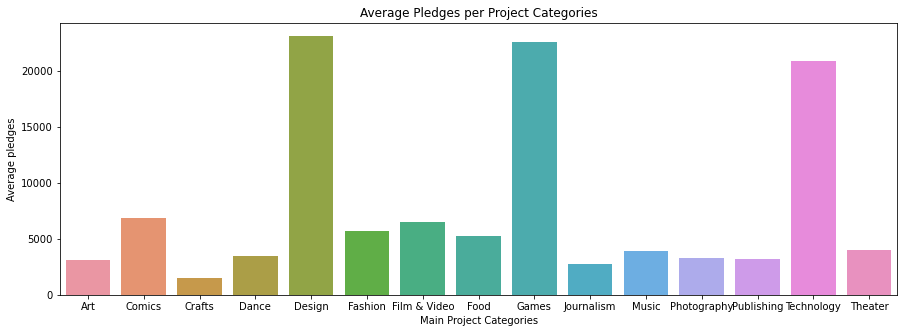

In [70]:
#Average Pledge by Main Category
plt.figure (figsize = (15,5))
result = df1["usd pledged"].groupby(df1["main_category"]).mean()
 
# plot the result
sns.barplot(x = result.index, y = result.values)
plt.title('Average Pledges per Project Categories')
plt.xlabel('Main Project Categories')
plt.ylabel('Average pledges')
plt.savefig('Pledges per Main Category.jpeg')

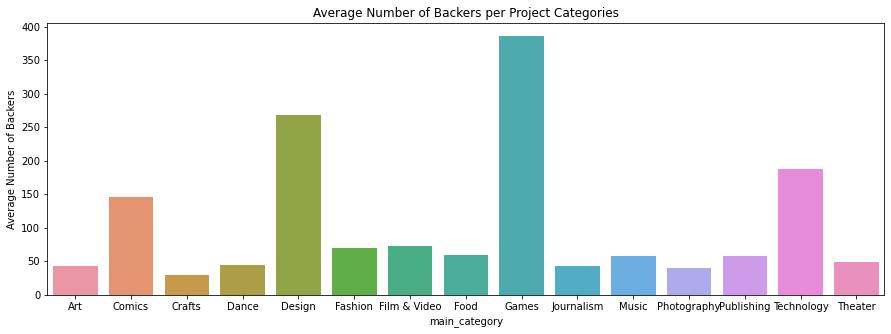

In [69]:
#Average Num Backers by Main Category
result2 = plt.figure (figsize = (15,5))
result2 = df1["backers"].groupby(df1["main_category"]).mean()
plt.title('Average Number of Backers per Project Categories')
plt.xlabel("Main Project Categories")
plt.ylabel('Average Number of Backers')

# plot the result
sns.barplot(x = result2.index, y = result2.values)
plt.savefig('Backers per Main Category.jpeg')

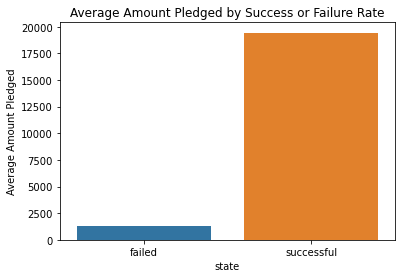

In [36]:
#Average Pledge by State
result3 = df1["usd pledged"].groupby(df1["state"]).mean()
plt.title('Average Amount Pledged by Success or Failure Rate')
plt.xlabel('Failure and Success Rates')
plt.ylabel('Average Amount Pledged') 
# plot the result
sns.barplot(x = result3.index, y = result3.values)
plt.savefig('PledgesperState.jpeg')

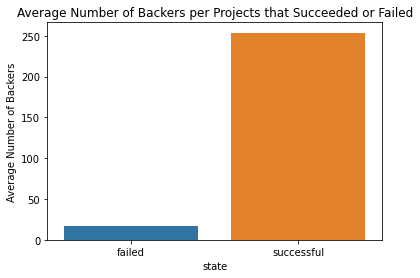

In [67]:
#Average Num Backers by State
result4 = df1["backers"].groupby(df1["state"]).mean()
plt.title('Average Number of Backers per Projects that Succeeded or Failed')
plt.xlabel('Success or Failure')
plt.ylabel('Average Number of Backers') 
# plot the result
sns.barplot(x = result4.index, y = result4.values)
plt.savefig('BackersperProjectState.jpeg')

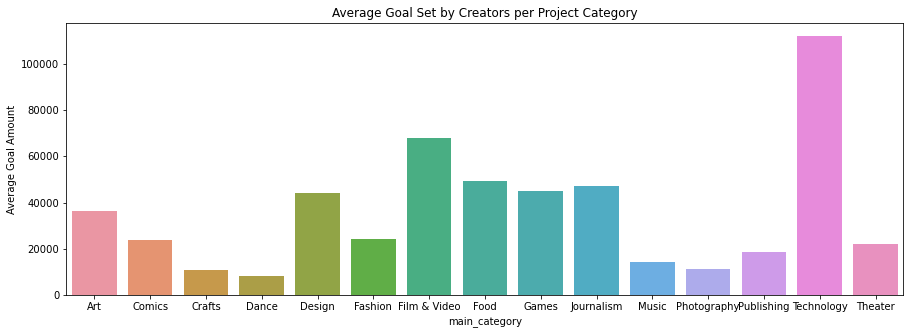

In [66]:
#Average Funding Goal by Main Category
result5 = plt.figure (figsize = (15,5))
result5 = df1["goal"].groupby(df1["main_category"]).mean()
plt.title('Average Goal Set by Creators per Project Category')
plt.xlabel('Project Categories')
plt.ylabel('Average Goal Amount') 
# plot the result
sns.barplot(x = result5.index, y = result5.values)
plt.savefig('GoalSetbyMainCategory.jpeg')

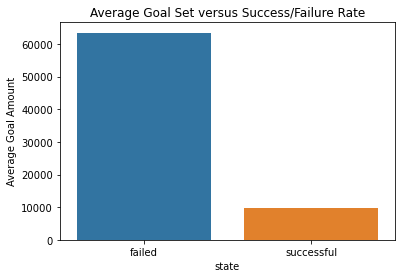

In [65]:
#Average Funding Goal by State
result6 = df1["goal"].groupby(df1["state"]).mean()
plt.title('Average Goal Set versus Success/Failure Rate')
plt.xlabel('Success or Failure')
plt.ylabel('Average Goal Amount') 
# plot the result
sns.barplot(x = result6.index, y = result6.values)
plt.savefig('AvgGoalAmtversusState.jpeg')

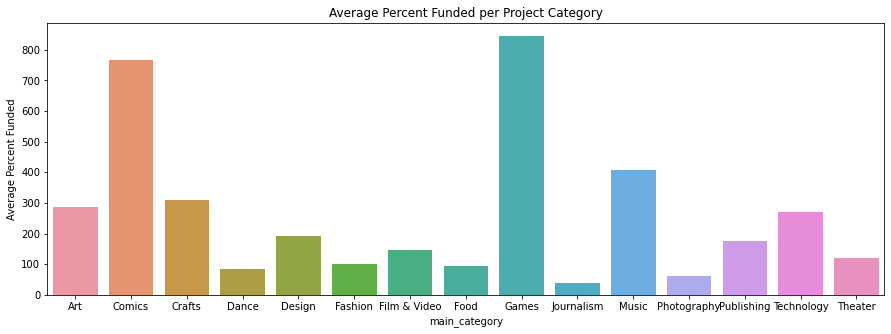

In [64]:
#Average Percentage of Funding Collected by Main Category
result7 = plt.figure (figsize = (15,5))
result7 = df1["pct_funded"].groupby(df1["main_category"]).mean()
plt.title('Average Percent Funded per Project Category')
plt.xlabel('Project Categories')
plt.ylabel('Average Percent Funded') 
# plot the result
sns.barplot(x = result7.index, y = result7.values)
plt.savefig('Percent Funded per Main Category.jpeg')

## <font color=#306EFF>Part 5: Group Presentation</font>

By now, your group should feel very comfortable with the aspects of the Kickstarter dataset. You should have a firm understanding of what Kickstarter is, what the dataset contains, the characteristics of each variable, how the variables interact with each other, and finally, which variables influence the outcome of the Kickstarter campaign. Can you put all this information together to tell a story about the data? Your presentation should include visualizations and clear answers to the two primary questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

In addition to these two questions, your presentation should cover the additional questions listed below. These questions should be easy to answer using the information you discovered above. When you are done, submit your completed notebook to me.   

### <font color=#306EFF>Questions to Answer</font>
1.	What main category is the most profitable (highest amount of money pledged)? 
2.	Which main category is the most popular (highest number of backers)?
3.	Which sub-categories are the most profitable and popular (top 3)?
4.	What are some of the characteristics of a successful Kickstarter campaign? 
5.	How does the success or failure of Kickstarter campaigns differ between main category, sub-category, country, and length of campaign? Please mention only the most notable – you do not need to detail the success/failure rate for each category/sub-category? 

***

### <font color=#306EFF>TIPS FOR A GREAT PRESENTATION</font>

* Start with the most important information (answers to the two questions above), and work backwards. The entire class will be working with the same dataset, therefore, we don't need to know the details of all your coding -- we just want to know what findings are most important to the questions. 
* Create clear visualizations. Make sure your audience can quickly and easily understand what your visualizations are showing. While you have a lot of options for how to style your visualizations, don't go overboard! 
* Make sure everyone understands what the visualization is showing; it should not have to stand on its own. When you present a visualization, you should be able to discuss what it means and what the significance is. 
* Use a single presentation format -- you can create a PowerPoint presentation or organize your notebook in a way that is easy to follow; reguardless of what your group puts together, you should use only ONE format. 

Visualizations to Create
Average Pledge by Main Category
Average Num Backers by Main Category
Average Pledge by State
Average Num Backers by State
Average Funding Goal by Main Category
Average Funding Goal by State
Average Percentage of Funding Collected by Main Category